# Citation

Much of the code and examples are copied/modified from 

> Blueprints for Text Analytics Using Python by Jens Albrecht, Sidharth Ramachandran, and Christian Winkler (O'Reilly, 2021), 978-1-492-07408-3.
>

- https://github.com/blueprints-for-text-analytics-python/blueprints-text
- https://github.com/blueprints-for-text-analytics-python/blueprints-text/blob/master/ch01/First_Insights.ipynb

---

# Setup

In [1]:
cd ../..

/Users/shanekercheval/repos/nlp-template


In [2]:
%run "source/config/notebook_settings.py"

In [18]:
pd.set_option('display.max_colwidth', None)

In [3]:
from source.library.utilities import Timer, get_logger
from source.library.text_analysis import count_tokens, tf_idf, get_context_from_keyword, count_keywords, count_keywords_by, impurity

In [32]:
with Timer("Loading Data"):
    path = 'artifacts/data/processed/reddit.pkl'
    df = pd.read_pickle(path)

Started: Loading Data
Finished (0.12 seconds)


---

# Exploratory Data Analysis

This section provides a basic exploration of the text and dataset.

## Dataset Summary

In [33]:
df.head(1)

,id,subreddit,title,post,impurity,post_clean,lemmas,bi_grams,adjs_verbs,nouns,noun_phrases,adj_noun_phrases,entities,post_length,num_tokens,language
10650,74qv99,Honda,J32A3 Block with J35Z2 Crank and Rods?,"Hello, <lb><lb>I have my J32A3 egine open, ready to put new rings and all. I would like to know if I can swap the J35Z2 crank and rods from an Accord Sedan v6 3.5. I would like to keep my pistons, just change the rods and crank to have a little more displacement. This is a doable option? there is something I need to know first? This is for my Acura TL 3G 2004 Manual Transmission. I really would like to know if it's possible and if possible what differences are between then J35Z2 and let's say the classic J35A3.<lb><lb>Thanks in advance.",0.01,"Hello, I have my J32A3 egine open, ready to put new rings and all. I would like to know if I can swap the J35Z2 crank and rods from an Accord Sedan v6 _NUMBER_ . I would like to keep my pistons, just change the rods and crank to have a little more displacement. This is a doable option? there is something I need to know first? This is for my Acura TL 3G _NUMBER_ Manual Transmission. I really would like to know if it's possible and if possible what differences are between then J35Z2 and let's say the classic J35A3. Thanks in advance.","[hello, j32a3, egine, open, ready, new, ring, like, know, swap, j35z2, crank, rod, accord, sedan, v6, _number_, like, piston, change, rod, crank, little, displacement, doable, option, need, know, acura, tl, 3, g, _number_, manual, transmission, like, know, possible, possible, difference, j35z2, let, classic, j35a3, thank, advance]","[j32a3 egine, egine open, new ring, j35z2 crank, accord sedan, sedan v6, v6 _number_, doable option, acura tl, tl 3, 3 g, g _number_, _number_ manual, manual transmission, classic j35a3]","[open, ready, new, like, know, swap, like, change, little, displacement, doable, need, know, like, know, possible, possible, let, classic]","[j32a3, egine, ring, j35z2, crank, rod, accord, sedan, v6, _number_, piston, rod, crank, option, acura, tl, g, _number_, manual, transmission, difference, j35z2, j35a3, thank, advance]","[egine open, new ring, doable option]","[egine open, new ring, doable option]","[accord (PRODUCT), first (ORDINAL), acura (NORP), 3 (CARDINAL), manual transmission (PERSON)]",542,46,English


### Numeric Summary

In [34]:
hlp.pandas.numeric_summary(df)

,# of Non-Nulls,# of Nulls,% Nulls,# of Zeros,% Zeros,Mean,St Dev.,Coef of Var,Skewness,Kurtosis,Min,10%,25%,50%,75%,90%,Max
impurity,"5,000",0,0.0%,"1,023",20.0%,0.0,0.0,1.0,1.9,7.8,0.0,0.0,0.0,0.0,0.0,0.0,0.2
post_length,"5,000",0,0.0%,0,0.0%,679.1,452.5,0.7,2.5,9.2,256.0,307.0,381.0,538.0,812.2,"1,217.1","4,174.0"
num_tokens,"5,000",0,0.0%,0,0.0%,54.2,36.3,0.7,2.6,10.0,15.0,25.0,31.0,43.0,65.0,96.0,383.0


### Non-Numeric

In [35]:
hlp.pandas.non_numeric_summary(df)

,# of Non-Nulls,# of Nulls,% Nulls,Most Freq. Value,# of Unique,% Unique
id,"5,000",0,0.0%,74qv99,"5,000",100.0%
subreddit,"5,000",0,0.0%,Lexus,20,0.4%
title,"5,000",0,0.0%,Need some advice,"4,995",99.9%
post,"5,000",0,0.0%,"Hello, <lb><lb>I have my J32A3[...]","5,000",100.0%
post_clean,"5,000",0,0.0%,"Hello, I have my J32A3 egine o[...]","5,000",100.0%
lemmas,"5,000",0,0.0%,"['hello', 'j32a3', 'egine', 'o[...]","5,000",100.0%
bi_grams,"5,000",0,0.0%,"['j32a3 egine', 'egine open', [...]","5,000",100.0%
adjs_verbs,"5,000",0,0.0%,"['open', 'ready', 'new', 'like[...]","5,000",100.0%
nouns,"5,000",0,0.0%,"['j32a3', 'egine', 'ring', 'j3[...]","5,000",100.0%
noun_phrases,"5,000",0,0.0%,[],"4,992",99.8%


---

### Examples

In [36]:
df['post'].iloc[0][0:1000]

"Hello, <lb><lb>I have my J32A3 egine open, ready to put new rings and all. I would like to know if I can swap the J35Z2 crank and rods from an Accord Sedan v6 3.5. I would like to keep my pistons, just change the rods and crank to have a little more displacement. This is a doable option? there is something I need to know first? This is for my Acura TL 3G 2004 Manual Transmission. I really would like to know if it's possible and if possible what differences are between then J35Z2 and let's say the classic J35A3.<lb><lb>Thanks in advance."

In [37]:
'|'.join(df['lemmas'].iloc[0])[0:1000]

'hello|j32a3|egine|open|ready|new|ring|like|know|swap|j35z2|crank|rod|accord|sedan|v6|_number_|like|piston|change|rod|crank|little|displacement|doable|option|need|know|acura|tl|3|g|_number_|manual|transmission|like|know|possible|possible|difference|j35z2|let|classic|j35a3|thank|advance'

In [38]:
'|'.join(df['bi_grams'].iloc[0])[0:1000]

'j32a3 egine|egine open|new ring|j35z2 crank|accord sedan|sedan v6|v6 _number_|doable option|acura tl|tl 3|3 g|g _number_|_number_ manual|manual transmission|classic j35a3'

In [39]:
'|'.join(df['noun_phrases'].iloc[0])[0:1000]

'egine open|new ring|doable option'

## Explore Non-Text Columns

#### Impurity

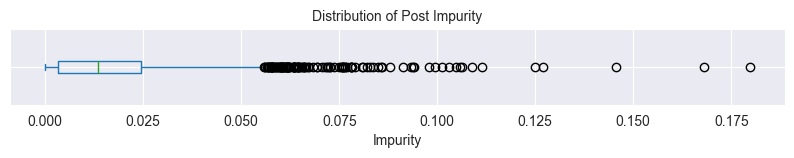

In [40]:
ax = df['impurity'].plot(kind='box', vert=False, figsize=(10, 1))
ax.set_title("Distribution of Post Impurity")
ax.set_xlabel("Impurity")
ax.set_yticklabels([])
ax;

In [24]:
df[['impurity', 'post', 'post_clean']].sort_values('impurity', ascending=False).head()

,impurity,post,post_clean
12357,0.18,"I'm looking to lease an a4 premium plus automatic with the nav package.<lb><lb>Vehicle Price:<tab><tab>$49,150.00<tab> <lb> <tab>AutoNation Savings:<tab>-<tab>$3,867.00<tab> <lb> <tab>AutoNation Price:<tab><tab>$45,283.00<tab> <lb> <tab> <tab> <lb> <tab>Sales Tax (estimate):<tab>+<tab>$2,734.98<tab> <lb> <tab>Title Fee:<tab>+<tab>$100.00<tab> <lb> <tab>Tire/Battery/MVWEA:<tab>+<tab>$4.00<tab> <lb> <tab>Tag/Registration Fees (estimate):<tab>+<tab>$207.00<tab> <lb> <tab>Electronic Filing:<tab>+<tab>$20.00<tab> <lb> <tab>Other:<tab>+<tab>$20.00<tab> <lb> <tab>Documentation Fee:<tab>+<tab>$300.00<tab> <lb> <tab>Balance Due (estimate):<tab><tab>$48,668.98<tab> <tab>No Trade-In<lb><lb>LEASE OPTIONS<lb>Cash Due<tab>36 months <tab>42 months <lb><lb>$2,000 <tab>$723<tab>$690<lb>$4,000 <tab>$663<tab>$639<lb>$6,000 <tab>$603<tab>$587<lb><lb><lb>This is my first lease, do these numbers look good? Should I push back or negotiate on anything?<lb><lb>Thanks!","I'm looking to lease an a4 premium plus automatic with the nav package. Vehicle Price: $ _NUMBER_ AutoNation Savings: $ _NUMBER_ AutoNation Price: $ _NUMBER_ Sales Tax (estimate): $ _NUMBER_ Title Fee: $ _NUMBER_ Tire/Battery/MVWEA: $ _NUMBER_ Tag/Registration Fees (estimate): $ _NUMBER_ Electronic Filing: $ _NUMBER_ Other: $ _NUMBER_ Documentation Fee: $ _NUMBER_ Balance Due (estimate): $ _NUMBER_ No Trade-In LEASE OPTIONS Cash Due _NUMBER_ months _NUMBER_ months $ _NUMBER_ $ _NUMBER_ $ _NUMBER_ $ _NUMBER_ $ _NUMBER_ $ _NUMBER_ $ _NUMBER_ $ _NUMBER_ $ _NUMBER_ This is my first lease, do these numbers look good? Should I push back or negotiate on anything? Thanks!"
12754,0.17,Bulbs Needed:<lb><lb><lb>**194 LED BULB x8**<lb><lb>4- DOORS<lb><lb>2- MAP LIGHTS<lb><lb>2- VANITY<lb><lb><lb>**3022 LED BULB x3**<lb><lb>2- CARGO DOOR<lb><lb>1- DOME LIGHT<lb><lb><lb>**BULBS USED:**<lb><lb>[194 LED BULBS](https://goo.gl/Jfu2Dx)<lb><lb>[3022 LED BULBS](https://goo.gl/fPgk6n)<lb><lb>[Trim Tools](https://goo.gl/hjxw8Z)<lb><lb>Parts list courtesy of [The Blue TRD](https://www.youtube.com/watch?v=CBJxfWdbEfo&amp;t=28s) from his You Tube Channel.<lb><lb>Just passing along the helpful info.,Bulbs Needed: ** _NUMBER_ LED BULB x8** _NUMBER_ - DOORS _NUMBER_ - MAP LIGHTS _NUMBER_ - VANITY ** _NUMBER_ LED BULB x3** _NUMBER_ - CARGO DOOR _NUMBER_ - DOME LIGHT **BULBS USED:** _NUMBER_ LED BULBS _NUMBER_ LED BULBS Trim Tools Parts list courtesy of The Blue TRD from his You Tube Channel. Just passing along the helpful info.
2730,0.15,"Breakdown below:<lb><lb>Elantra GT<lb><lb>2.0L 4-cylinder<lb><lb>6-speed Manual Transmission<lb><lb>$19,350<lb><lb>Elantra GT<lb><lb>2.0L 4-cylinder<lb><lb>6-speed Automatic Transmission w/ SHIFTRONIC®<lb><lb>$20,350<lb><lb>Elantra GT Sport<lb><lb>1.6L Turbo GDI 4-cylinder<lb><lb>6-speed Manual Transmission<lb><lb>$23,250<lb><lb>Elantra GT Sport<lb><lb>1.6L Turbo GDI 4-cylinder<lb><lb>7-speed EcoShift® Dual Clutch Transmission w/ SHIFTRONIC®<lb><lb>$24,350",Breakdown below: Elantra GT _NUMBER_ .0L _NUMBER_ -cylinder _NUMBER_ -speed Manual Transmission $ _NUMBER_ Elantra GT _NUMBER_ .0L _NUMBER_ -cylinder _NUMBER_ -speed Automatic Transmission w/ SHIFTRONIC® $ _NUMBER_ Elantra GT Sport _NUMBER_ .6L Turbo GDI _NUMBER_ -cylinder _NUMBER_ -speed Manual Transmission $ _NUMBER_ Elantra GT Sport _NUMBER_ .6L Turbo GDI _NUMBER_ -cylinder _NUMBER_ -speed EcoShift® Dual Clutch Transmission w/ SHIFTRONIC® $ _NUMBER_
8700,0.13,"E-price:<lb>$20,863.00<lb>Freight:<lb>$900.00<lb>Processing Fee:<lb>$299.00<lb>Total before tax and tag fees:<lb>$22,062.00<lb>7% State SALES TAX: $ 1,544.34<lb>2 YEAR TAG FEES: $187.00<lb>TITLE: $100.00<lb>REGISTRATION: $20.00<lb>LIEN: $20.00<lb>INSPECTION: $25.00 <lb>State TEMP TAG: $20.00<lb>State TIRE FEE: $4.00<lb>TOTAL OUT THE DOOR YOU REQUESTED: $ 23,982.34<lb>",E-price: $ _NUMBER_ Freight: $ _NUMBER_ Processing Fee: $ _NUMBER_ Total before tax and tag fees: $ _NUMBER_ _NUMBER_ % State SALES TAX: $ _NUMBER_ _NUMBER_ YEAR TAG

In [41]:
df['language'].value_counts(ascending=False)

English    4996
Name: language, dtype: int64

In [42]:
df['subreddit'].value_counts(ascending=False)

Lexus                 266
Hyundai               263
Trucks                262
Honda                 261
MPSelectMiniOwners    260
mercedes_benz         259
mazda3                257
Harley                255
volt                  252
Volkswagen            252
Audi                  252
teslamotors           250
Volvo                 249
Mustang               248
BMW                   239
saab                  239
4Runner               238
Porsche               236
subaru                233
Wrangler              229
Name: subreddit, dtype: int64

Explore idiosyncrasies of various columns, e.g. same speaker represented multiple ways.

---

## Explore Text Column|

### Top Words Used

In [43]:
count_tokens(df['lemmas']).head(20)

,frequency
token,
_number_,14272
car,4982
look,2778
like,2355
drive,1879
know,1818
get,1750
new,1737
want,1688


---

### Distribution of Text Length

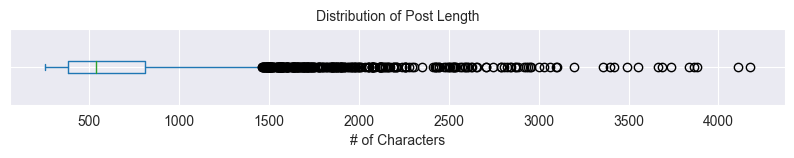

In [44]:
ax = df['post_length'].plot(kind='box', vert=False, figsize=(10, 1))
ax.set_title("Distribution of Post Length")
ax.set_xlabel("# of Characters")
ax.set_yticklabels([])
ax;

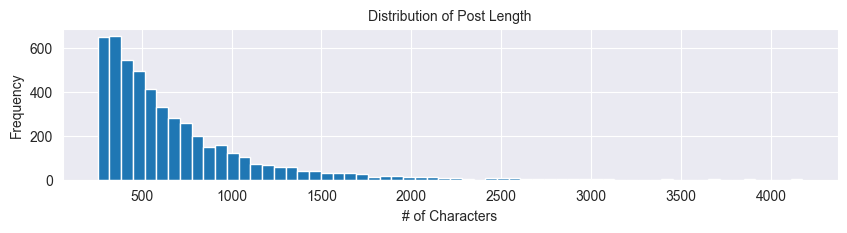

In [45]:
ax = df['post_length'].plot(kind='hist', bins=60, figsize=(10, 2));
ax.set_title("Distribution of Post Length")
ax.set_xlabel("# of Characters")
ax;

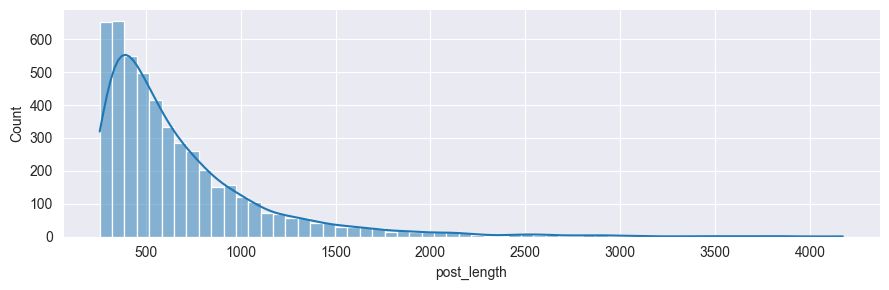

In [46]:
import seaborn as sns
sns.displot(df['post_length'], bins=60, kde=True, height=3, aspect=3);

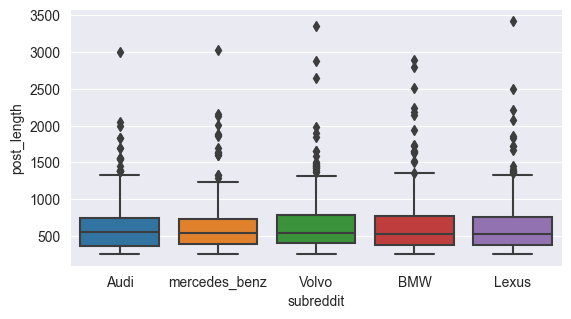

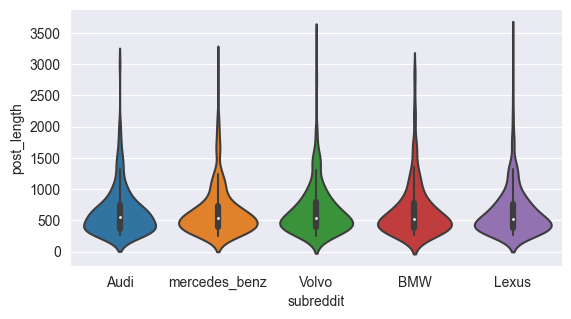

In [47]:
where = df['subreddit'].isin([
    'Lexus', 
    'mercedes_benz',
    'Audi',
    'Volvo',
    'BMW',
])
g = sns.catplot(data=df[where], x="subreddit", y="post_length", kind='box')
g.fig.set_size_inches(6, 3)
g.fig.set_dpi(100)
g = sns.catplot(data=df[where], x="subreddit", y="post_length", kind='violin')
g.fig.set_size_inches(6, 3)
g.fig.set_dpi(100)

### Word Frequency

In [56]:
counts_df = count_tokens(df['lemmas']).drop(index='_number_')

In [58]:
def plot_wordcloud(frequency_dict):
    wc = wordcloud.WordCloud(background_color='white',
        #colormap='RdYlGn',
        colormap='tab20b',
        width=round(hlp.plot.STANDARD_WIDTH*100),
        height=round(hlp.plot.STANDARD_HEIGHT*100),
        max_words = 200, max_font_size=150,
        random_state=42
    )
    wc.generate_from_frequencies(frequency_dict)

    fig, ax = plt.subplots(figsize=(hlp.plot.STANDARD_WIDTH, hlp.plot.STANDARD_HEIGHT))
    ax.imshow(wc, interpolation='bilinear')
    #plt.title("XXX")
    plt.axis('off')

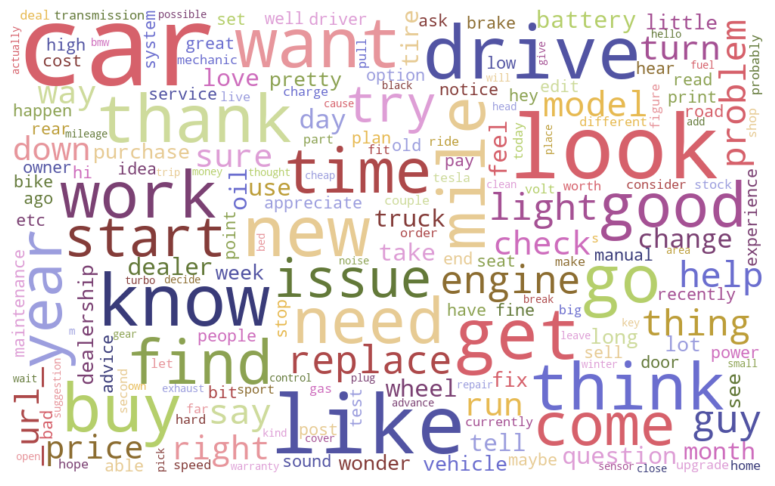

In [59]:
plot_wordcloud(counts_df.to_dict()['frequency']);

### TF-IDF

In [60]:
tf_idf_df = tf_idf(
    df=df,
    tokens_column='lemmas',
    segment_columns = None,
    min_frequency_corpus=20,
    min_frequency_document=20,
)

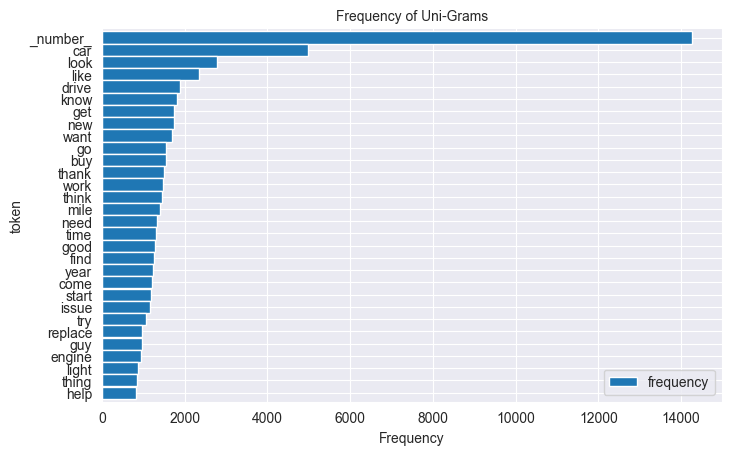

In [61]:
ax = tf_idf_df.sort_values(by='frequency', ascending=False).head(30)[['frequency']].plot(kind='barh', width=0.99)
ax.set_title("Frequency of Uni-Grams")
ax.set_xlabel("Frequency")
ax.invert_yaxis();

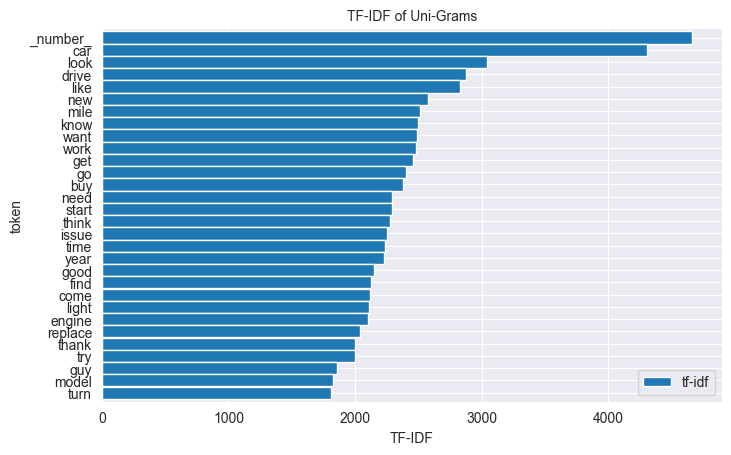

In [62]:
ax = tf_idf_df.head(30)[['tf-idf']].plot(kind='barh', width=0.99)
ax.set_title("TF-IDF of Uni-Grams")
ax.set_xlabel("TF-IDF")
ax.invert_yaxis();

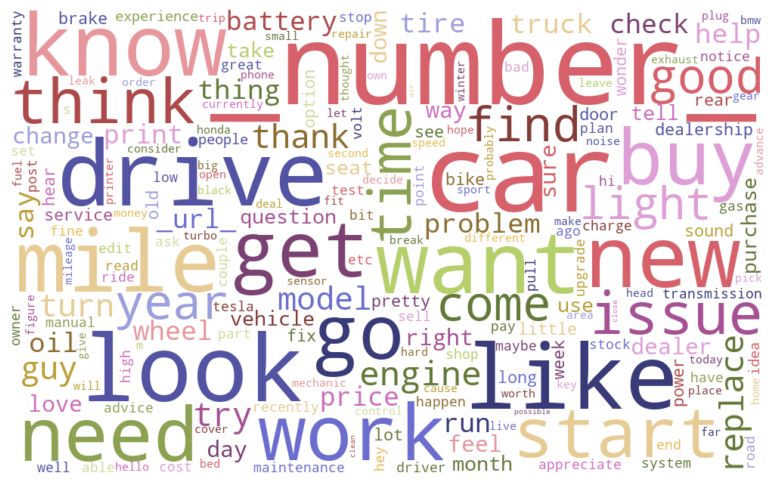

In [63]:
plot_wordcloud(tf_idf_df.to_dict()['tf-idf']);

#### 

In [65]:
tf_idf_per_year = tf_idf(
    df=df,
    tokens_column='lemmas',
    segment_columns = 'subreddit',
    min_frequency_corpus=10,
    min_frequency_document=10,
)

In [74]:
stop_words = ['_number_', 'lexus', 'car']
tokens_to_show = tf_idf_per_year.query("subreddit == 'Lexus'").reset_index()
tokens_to_show = tokens_to_show[~tokens_to_show.token.isin(stop_words)]

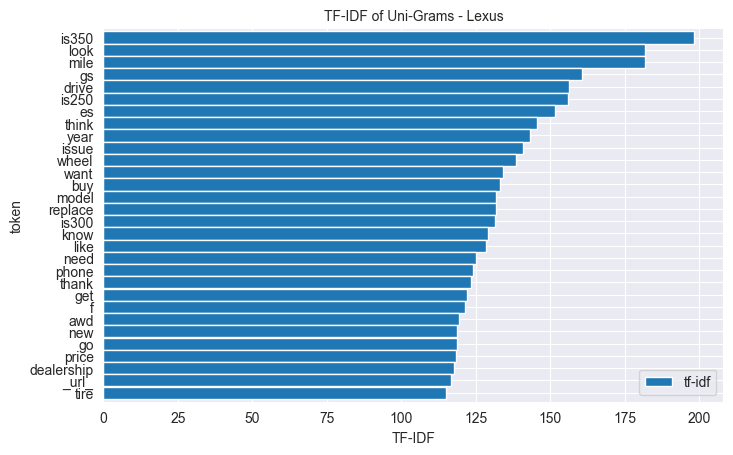

In [75]:
ax = tokens_to_show.head(30).set_index('token')[['tf-idf']].plot(kind='barh', width=0.99)
ax.set_title("TF-IDF of Uni-Grams - Lexus")
ax.set_xlabel("TF-IDF")
ax.invert_yaxis();

In [76]:
tokens_to_show = tokens_to_show[['token', 'tf-idf']].set_index('token')
tokens_to_show = tokens_to_show.to_dict()['tf-idf']

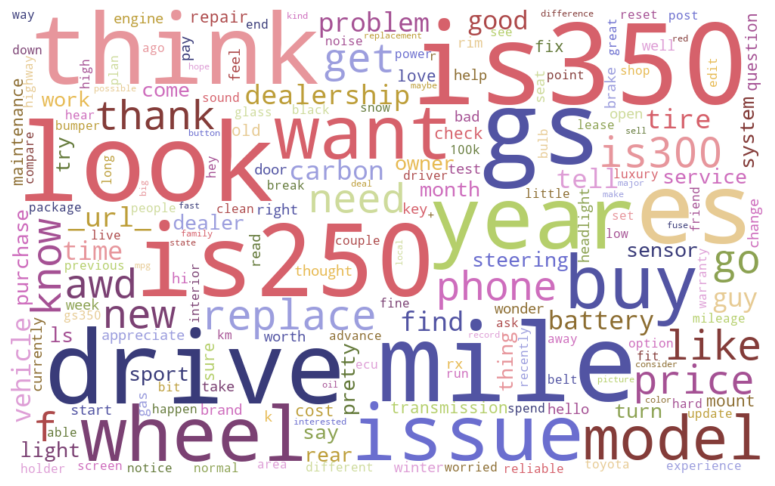

In [77]:
plot_wordcloud(tokens_to_show);

#### Per Year - 2015

In [ ]:
stop_words = ['seventieth']
tokens_to_show = tf_idf_per_year.query('year == 2015').reset_index()
tokens_to_show = tokens_to_show[~tokens_to_show.token.isin(stop_words)]

In [ ]:
ax = tokens_to_show.head(30).set_index('token')[['tf-idf']].plot(kind='barh', width=0.99)
ax.set_title("TF-IDF of Uni-Grams - 2015")
ax.set_xlabel("TF-IDF")
ax.invert_yaxis();

In [ ]:
tokens_to_show = tokens_to_show[['token', 'tf-idf']].set_index('token')
tokens_to_show = tokens_to_show.to_dict()['tf-idf']

In [ ]:
plot_wordcloud(tokens_to_show);

### Keywords in Context

In [ ]:
contexts = get_context_from_keyword(
    documents=df[df['year'] == 2015]['text'],
    window_width=50,
    keyword='sdgs', random_seed=42
)
for x in contexts:
    print(x)

In [ ]:
contexts = get_context_from_keyword(
    documents=df[df['year'] == 2015]['text'],
    window_width=50,
    keyword='sids', random_seed=42
)
for x in contexts:
    print(x)

In [ ]:
contexts = get_context_from_keyword(
    documents=df[df['year'] == 2015]['text'],
    window_width=50,
    keyword='pv', random_seed=42
)
for x in contexts:
    print(x)

---

## Bi-Grams

In [ ]:
tf_idf_df = tf_idf(
    df=df,
    tokens_column='bi_grams',
    segment_columns = None,
    min_frequency_corpus=20,
    min_frequency_document=20,
)

In [ ]:
ax = tf_idf_df.sort_values(by='frequency', ascending=False).head(30)[['frequency']].plot(kind='barh', width=0.99)
ax.set_title("Frequency of Bi-Grams")
ax.set_xlabel("Frequency")
ax.invert_yaxis();

In [ ]:
ax = tf_idf_df.head(30)[['tf-idf']].plot(kind='barh', width=0.99)
ax.set_title("TF-IDF of Bi-Grams")
ax.set_xlabel("TF-IDF")
ax.invert_yaxis();

#### By Year

In [ ]:
tf_idf_per_year = tf_idf(
    df=df,
    tokens_column='bi_grams',
    segment_columns = 'year',
    min_frequency_corpus=3,
    min_frequency_document=3,
)

In [ ]:
stop_words = ['twenty-fifth anniversary', 'twenty-five years', 'twenty years', 'twenty fifth']
tokens_to_show = tf_idf_per_year.query('year == 1970').reset_index()
tokens_to_show = tokens_to_show[~tokens_to_show.token.isin(stop_words)]
tokens_to_show = tokens_to_show[['token', 'tf-idf']].set_index('token')
tokens_to_show = tokens_to_show.to_dict()['tf-idf']
plot_wordcloud(tokens_to_show);

In [ ]:
stop_words = ['seventieth anniversary']
tokens_to_show = tf_idf_per_year.query('year == 2015').reset_index()
tokens_to_show = tokens_to_show[~tokens_to_show.token.isin(stop_words)]
tokens_to_show = tokens_to_show[['token', 'tf-idf']].set_index('token')
tokens_to_show = tokens_to_show.to_dict()['tf-idf']
plot_wordcloud(tokens_to_show);

In [ ]:
stop_words = ['seventieth anniversary']
#tokens_to_show = tf_idf_per_year.query('year == 2015').reset_index()
tokens_to_show = tf_idf_per_year.reset_index()
tokens_to_show = tokens_to_show[~tokens_to_show.token.isin(stop_words)]

# filter for "climate"
tokens_to_show = tokens_to_show[tokens_to_show['token'].str.contains('climate')]
tokens_to_show

In [ ]:
tokens_to_show = tokens_to_show[['token', 'tf-idf']].set_index('token')
tokens_to_show = tokens_to_show.to_dict()['tf-idf']
plot_wordcloud(tokens_to_show);

---

# Count Keywords Over Time

In [ ]:
keyword_count_over_time = count_keywords_by(
    df=df,
    by='year',
    tokens='tokens',
    keywords = ['nuclear', 'terrorism', 'climate', 'freedom'],
)
keyword_count_over_time.head()

In [ ]:
ax = keyword_count_over_time.plot(kind='line')
ax.set_title("Keyword count over time")
ax.set_ylabel("# of Occurrences")

In [ ]:
keyword_count_over_time = count_keywords_by(
    df=df,
    by='year',
    tokens='bi_grams',
    keywords = ['climate change', 'human rights', 'middle east'],
)
keyword_count_over_time.head()

In [ ]:
ax = keyword_count_over_time.plot(kind='line')
ax.set_title("Keyword count over time")
ax.set_ylabel("# of Occurrences")

In [ ]:
contexts = get_context_from_keyword(
    documents=df[df['year'] <= 1980]['text'],
    window_width=50,
    keyword='human rights', random_seed=42
)
for x in contexts:
    print(x)

---

In [ ]:
keywords = ['terrorism', 'terrorist', 'nuclear', 'war', 'oil',
            'syria', 'syrian', 'refugees', 'migration', 'peacekeeping', 
            'humanitarian', 'climate', 'change', 'sustainable', 'sdgs']  

freq_df = count_keywords_by(df, by='year', tokens='tokens', keywords=keywords)
freq_df.head()

In [ ]:
df.groupby('year')['num_tokens'].sum().head()

In [ ]:
# compute relative frequencies based on total number of tokens per year
freq_df = freq_df.div(df.groupby('year')['num_tokens'].sum(), axis=0)
# apply square root as sublinear filter for better contrast
freq_df = freq_df.apply(np.sqrt)
freq_df.head()

In [ ]:
plt.figure(figsize=(10, 3))
sns.set(font_scale=1)
sns.heatmap(data=freq_df.T, 
            xticklabels=True, yticklabels=True, cbar=False, cmap="Reds")
sns.set(font_scale=1);

---